In [1]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [3]:
# Libraires to help with plotting

from ipywidgets import interact, interactive, fixed, interact_manual

# Training And Testing

In [6]:
y_data = df['price']
x_data=df.drop('price',axis=1) # drops price column, creates new df without it called x_data

In [7]:
from sklearn.model_selection import train_test_split # Library that splits data for testing and training

In [8]:
# Sets training and testing variables, test size proportion, and randomness level

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=1)

In [9]:
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 61
number of training samples: 140


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lre=LinearRegression()

In [12]:
# Fitting the model with the training data

lre.fit(x_train[['horsepower']], y_train)
lre.score(x_train[['horsepower']], y_train)

0.6628063120233265

# Cross Validation Score

In [13]:
from sklearn.model_selection import cross_val_score

Input the object, the feature ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds.

In [14]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4) # Default score is the R^2 for each fold
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

To get the MSE for each fold, set scoring to 'neg_mean_squared_error' and multiply the whole thing by (-1). 

In [15]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026705, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

# Cross Validation Prediction

In [16]:
# Instead of splitting the data using 'train_test_split()' split it with 'cross_val_predict'.
# This uses one fold for testing, and the others for training.

from sklearn.model_selection import cross_val_predict

In [17]:
# This gives the predicted values without going through LinearRegression object.
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)

# Polynomial Transformations And Plotting

In [18]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
lr = LinearRegression()

Text(0.5, 1.0, 'R^2 Using Training Data')

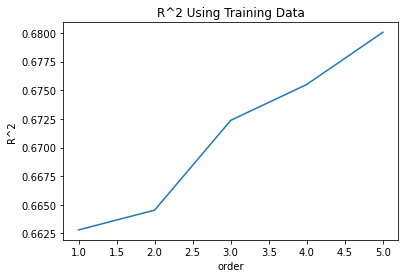

In [20]:
Rsqu_test = []

order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']]) 
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_train_pr, y_train))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Training Data')  

# Ridge Regression

In [21]:
from sklearn.linear_model import Ridge

In [22]:
pr=PolynomialFeatures(degree=2) # Polynomial regression with degree 2

# Resetting and setting attributes to the correct degree
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

#### Set Alpha, Fit Model

In [23]:
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [24]:
# Getting predicted values
yhat = RigeModel.predict(x_test_pr)

Let's compare the first five predicted samples to our test set:

In [25]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 9412.60278819  6270.22952566 10868.96068958  4701.74937033]
test set : [ 9549.  6229. 10245.  7295.]


In [28]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,100))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 100/100 [00:00<00:00, 358.70it/s, Test Score=0.794, Train Score=0.869]


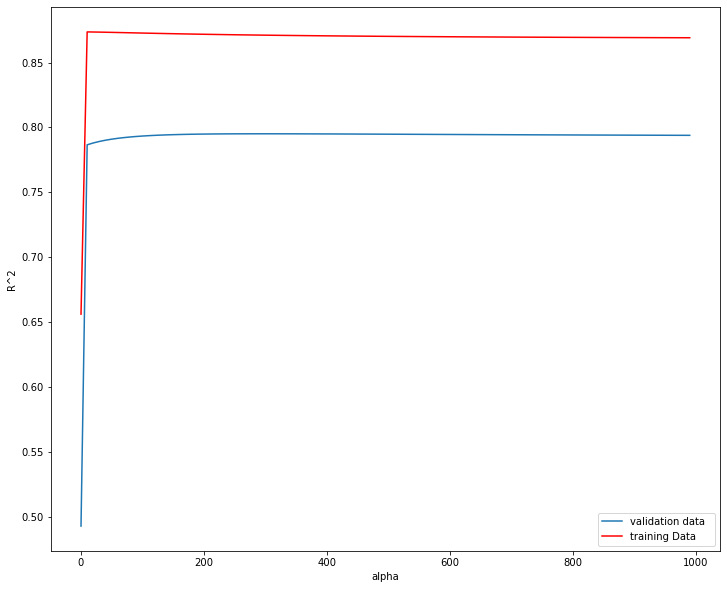

In [29]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

From the graph above, it is clear that R^2 decreases as alpha increases.

# Grid Search

The term alpha is a hyperparameter. Sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
# Dictionary of parameter values

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [32]:
# Create Ridge object

RR=Ridge()
RR

Ridge()

In [33]:
# Create a Ridge search object

Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [34]:
# Fit the model

Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [35]:
# The grid search object finds the best parameter values

BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [36]:
# Now test the model on the test data

BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.7953990474703005

## This is another grid search but including the normalization parameters

In [37]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

Ridge(alpha=0.1, normalize=True)

In [38]:
Grid2.best_estimator_.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.7897709936640183